## Transaction Fraud Detection in Personal Finance Systems

### Objective: 
Building a machine learning model to classify whether a financial transaction is fraudulent or legitimate based on a variety of real-world features (user behavior, merchant type, transaction patterns, location, amount, etc.).

## Why It’s Impactful:
#### Real-world relevance: Financial fraud is a massive concern for banks, fintechs, and users.

#### Industry alignment: Fraud detection is a top priority in fintech (e.g., PayTM, PhonePe, Razorpay, etc.).

#### Machine learning depth: It combines user patterns, anomaly detection, feature engineering, and model interpretability.

#### Imbalanced data challenge: Real fraud data is rare, adding another dimension for handling skewed classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Fintech Project\notebook\financial_transactions.csv")
df.head()

,transaction_id,user_id,timestamp,amount,merchant,category,payment_method,location,account_type,device_info,is_fraud,fraud_reason
0,7854bd39-45db-4983-9c52-230582b15731,U6385,2023-05-31 05:58:36,1097.00,Water Utility,Bills,UPI,"New Daniel, Equatorial Guinea",Business,Tablet,0,NaN
1,fdef04c1-8262-4c5b-9300-ada2f561eacf,U5151,2025-03-12 21:48:48,736.67,Indigo Airlines,Travel,UPI,"Erictown, Swaziland",Credit,Android,0,NaN
2,a39d1f02-d90a-4d6b-8058-78cbc3847bc1,U2618,2024-03-24 22:07:51,503.83,Electric Company,Bills,Credit Card,"Reevesshire, Nigeria",Business,iPhone,0,NaN
3,f3ff8311-6a42-41d5-9fa5-10e969ea6f4a,U7806,2025-01-25 18:52:05,776.28,NaN,Travel,Debit Card,"Lopezburgh, Morocco",Business,Tablet,0,NaN
4,2c0d5af0-acb3-4bba-82ec-cdaf18e92e24,U1785,2023-10-19 15:13:47,305.88,AT&T,Bills,UPI,"Sheriview, Swaziland",Credit,iPhone,0,NaN


In [3]:
print(df.shape)

(502489, 12)


In [4]:
print(df.columns)

Index(['transaction_id', 'user_id', 'timestamp', 'amount', 'merchant',
       'category', 'payment_method', 'location', 'account_type', 'device_info',
       'is_fraud', 'fraud_reason'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502489 entries, 0 to 502488
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  502489 non-null  object 
 1   user_id         502489 non-null  object 
 2   timestamp       502489 non-null  object 
 3   amount          477550 non-null  float64
 4   merchant        487468 non-null  object 
 5   category        502489 non-null  object 
 6   payment_method  502489 non-null  object 
 7   location        502489 non-null  object 
 8   account_type    502489 non-null  object 
 9   device_info     502489 non-null  object 
 10  is_fraud        502489 non-null  int64  
 11  fraud_reason    9965 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 46.0+ MB


In [7]:
df.describe()

,amount,is_fraud
count,477550.000000,502489.000000
mean,499.021168,0.019831
std,499.088898,0.139420
min,0.000000,0.000000
25%,143.230000,0.000000
50%,345.460000,0.000000
75%,692.170000,0.000000
max,6387.090000,1.000000


### Dropping unnecessary columns

In [8]:
df = df.drop(columns=['transaction_id','user_id','location'], axis =1)

In [9]:
df.head()

,timestamp,amount,merchant,category,payment_method,account_type,device_info,is_fraud,fraud_reason
0,2023-05-31 05:58:36,1097.00,Water Utility,Bills,UPI,Business,Tablet,0,NaN
1,2025-03-12 21:48:48,736.67,Indigo Airlines,Travel,UPI,Credit,Android,0,NaN
2,2024-03-24 22:07:51,503.83,Electric Company,Bills,Credit Card,Business,iPhone,0,NaN
3,2025-01-25 18:52:05,776.28,NaN,Travel,Debit Card,Business,Tablet,0,NaN
4,2023-10-19 15:13:47,305.88,AT&T,Bills,UPI,Credit,iPhone,0,NaN


### Updating datatypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502489 entries, 0 to 502488
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       502489 non-null  object 
 1   amount          477550 non-null  float64
 2   merchant        487468 non-null  object 
 3   category        502489 non-null  object 
 4   payment_method  502489 non-null  object 
 5   account_type    502489 non-null  object 
 6   device_info     502489 non-null  object 
 7   is_fraud        502489 non-null  int64  
 8   fraud_reason    9965 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 34.5+ MB


In [12]:
# Updating timestamp from object to datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502489 entries, 0 to 502488
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       502489 non-null  datetime64[ns]
 1   amount          477550 non-null  float64       
 2   merchant        487468 non-null  object        
 3   category        502489 non-null  object        
 4   payment_method  502489 non-null  object        
 5   account_type    502489 non-null  object        
 6   device_info     502489 non-null  object        
 7   is_fraud        502489 non-null  int64         
 8   fraud_reason    9965 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 34.5+ MB


In [14]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

In [15]:
df.head()

,timestamp,amount,merchant,category,payment_method,account_type,device_info,is_fraud,fraud_reason,year,month
0,2023-05-31 05:58:36,1097.00,Water Utility,Bills,UPI,Business,Tablet,0,NaN,2023,5
1,2025-03-12 21:48:48,736.67,Indigo Airlines,Travel,UPI,Credit,Android,0,NaN,2025,3
2,2024-03-24 22:07:51,503.83,Electric Company,Bills,Credit Card,Business,iPhone,0,NaN,2024,3
3,2025-01-25 18:52:05,776.28,NaN,Travel,Debit Card,Business,Tablet,0,NaN,2025,1
4,2023-10-19 15:13:47,305.88,AT&T,Bills,UPI,Credit,iPhone,0,NaN,2023,10


In [17]:
# Dropping timestamp
df  = df.drop(columns = ['timestamp'], axis  = 1)

In [18]:
df.head()

,amount,merchant,category,payment_method,account_type,device_info,is_fraud,fraud_reason,year,month
0,1097.00,Water Utility,Bills,UPI,Business,Tablet,0,NaN,2023,5
1,736.67,Indigo Airlines,Travel,UPI,Credit,Android,0,NaN,2025,3
2,503.83,Electric Company,Bills,Credit Card,Business,iPhone,0,NaN,2024,3
3,776.28,NaN,Travel,Debit Card,Business,Tablet,0,NaN,2025,1
4,305.88,AT&T,Bills,UPI,Credit,iPhone,0,NaN,2023,10


### Checking Missing Values

In [21]:
missing = df.isnull().sum().sort_values(ascending=False)
missing

fraud_reason      492524
amount             24939
merchant           15021
category               0
account_type           0
payment_method         0
device_info            0
is_fraud               0
year                   0
month                  0
dtype: int64

In [22]:
missing_percent = (missing/len(df))*100
missing_percent

fraud_reason      98.016872
amount             4.963094
merchant           2.989319
category           0.000000
account_type       0.000000
payment_method     0.000000
device_info        0.000000
is_fraud           0.000000
year               0.000000
month              0.000000
dtype: float64

In [23]:
# Handling missing values
# 1. Dropping fraud_reason columns
df = df.drop(columns = ['fraud_reason'], axis =1)
df['amount'] = df.groupby('category')['amount'].transform(lambda x: x.fillna(x.median()))
df['merchant'].fillna('Unknown', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13232\1163277349.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['merchant'].fillna('Unknown', inplace=True)


In [24]:
missing = df.isnull().sum().sort_values(ascending=False)
missing

amount            0
merchant          0
category          0
payment_method    0
account_type      0
device_info       0
is_fraud          0
year              0
month             0
dtype: int64

### Handling Duplicate 

In [26]:
df.duplicated().sum()

np.int64(5908)

In [27]:
# Dropping duplicate records

df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.shape

(496581, 9)

In [31]:
df.columns

Index(['amount', 'merchant', 'category', 'payment_method', 'account_type',
       'device_info', 'is_fraud', 'year', 'month'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496581 entries, 0 to 502488
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   amount          496581 non-null  float64
 1   merchant        496581 non-null  object 
 2   category        496581 non-null  object 
 3   payment_method  496581 non-null  object 
 4   account_type    496581 non-null  object 
 5   device_info     496581 non-null  object 
 6   is_fraud        496581 non-null  int64  
 7   year            496581 non-null  int32  
 8   month           496581 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 34.1+ MB


## Checking  Class Distribution

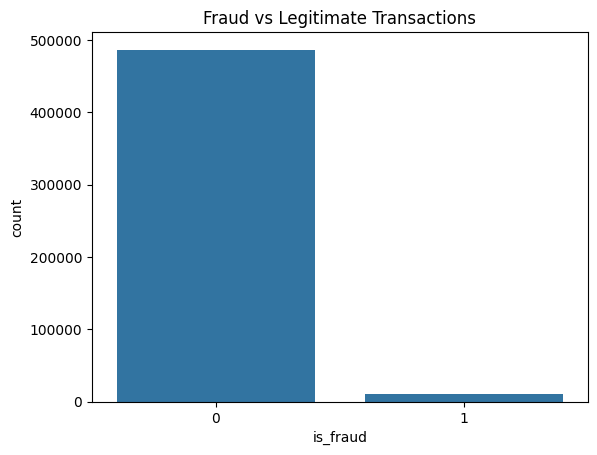

is_fraud
0    0.980052
1    0.019948
Name: proportion, dtype: float64


In [33]:
sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs Legitimate Transactions")
plt.show()

print(df['is_fraud'].value_counts(normalize=True))

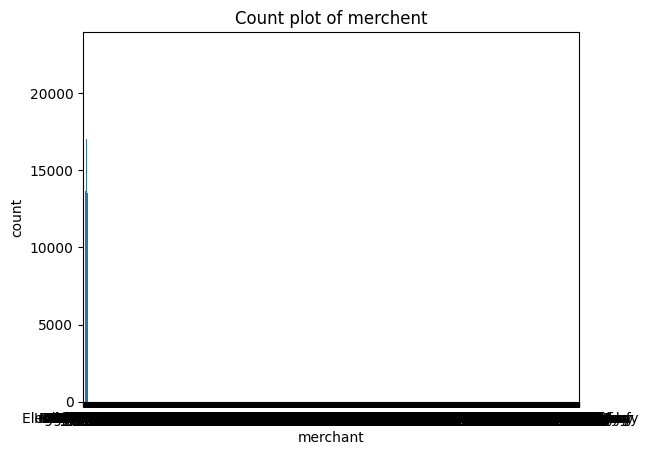

merchant
Bet365              0.045912
Casino Royale       0.045553
PokerStars          0.045406
AT&T                0.034842
Electric Company    0.034637
                      ...   
Verozon             0.000002
Starbuzks           0.000002
Best auy            0.000002
xisney+             0.000002
Spjtify             0.000002
Name: proportion, Length: 3289, dtype: float64


In [34]:
sns.countplot(x='merchant', data=df)
plt.title("Count plot of merchent")
plt.show()

print(df['merchant'].value_counts(normalize=True))

### There are too many merchant so I need to drop this feature. 

In [35]:
df = df.drop(columns=['merchant'], axis =1)

In [36]:
df.head()

,amount,category,payment_method,account_type,device_info,is_fraud,year,month
0,1097.00,Bills,UPI,Business,Tablet,0,2023,5
1,736.67,Travel,UPI,Credit,Android,0,2025,3
2,503.83,Bills,Credit Card,Business,iPhone,0,2024,3
3,776.28,Travel,Debit Card,Business,Tablet,0,2025,1
4,305.88,Bills,UPI,Credit,iPhone,0,2023,10


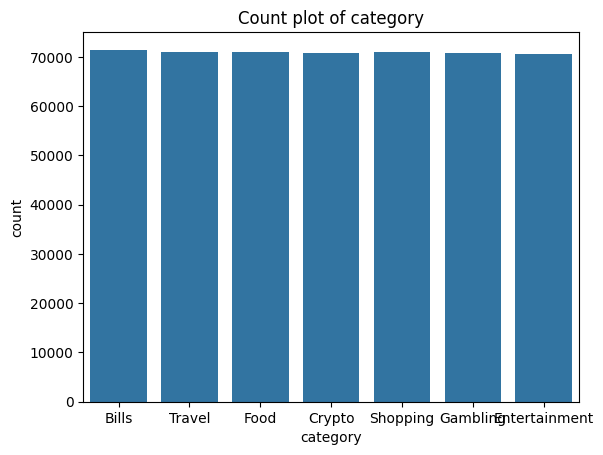

category
Bills            0.143904
Food             0.143076
Shopping         0.143052
Travel           0.142794
Gambling         0.142559
Crypto           0.142476
Entertainment    0.142138
Name: proportion, dtype: float64


In [37]:
sns.countplot(x='category', data=df)
plt.title("Count plot of category")
plt.show()

print(df['category'].value_counts(normalize=True))

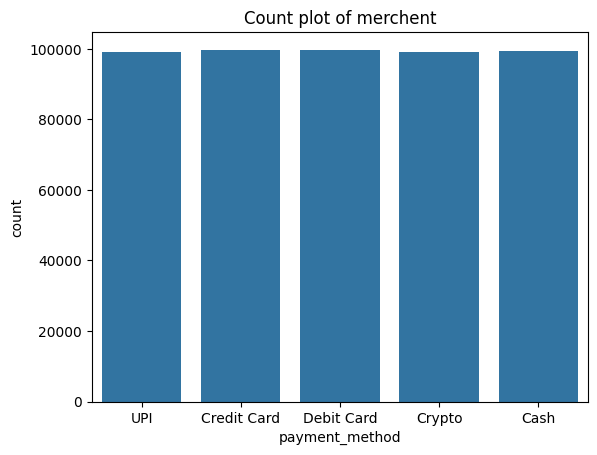

payment_method
Debit Card     0.200868
Credit Card    0.200469
Cash           0.199899
Crypto         0.199506
UPI            0.199259
Name: proportion, dtype: float64


In [38]:
sns.countplot(x='payment_method', data=df)
plt.title("Count plot of merchent")
plt.show()

print(df['payment_method'].value_counts(normalize=True))

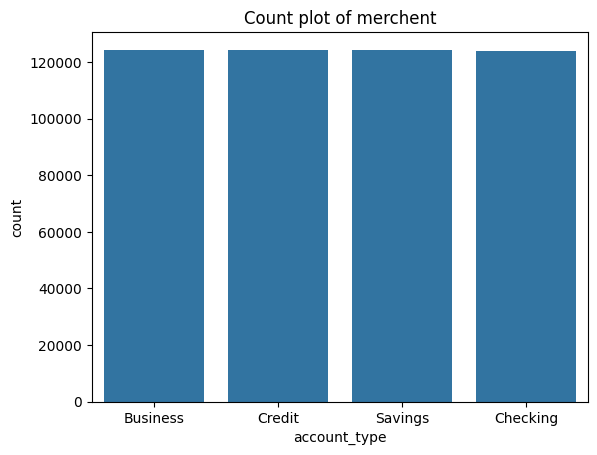

account_type
Credit      0.250368
Savings     0.250237
Business    0.250082
Checking    0.249313
Name: proportion, dtype: float64


In [39]:
sns.countplot(x='account_type', data=df)
plt.title("Count plot of merchent")
plt.show()

print(df['account_type'].value_counts(normalize=True))

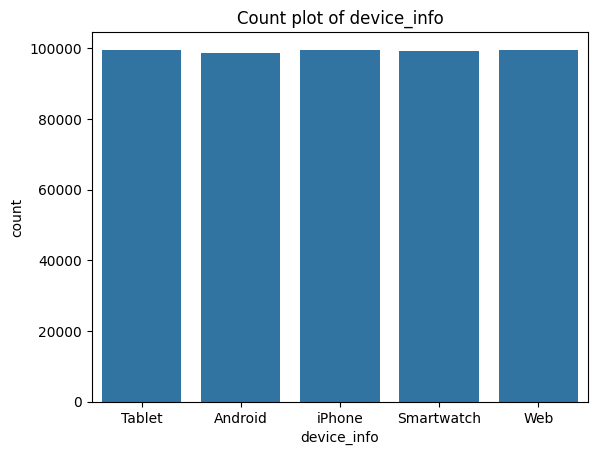

device_info
Tablet        0.200642
Web           0.200539
iPhone        0.200336
Smartwatch    0.199659
Android       0.198824
Name: proportion, dtype: float64


In [40]:
sns.countplot(x='device_info', data=df)
plt.title("Count plot of device_info")
plt.show()

print(df['device_info'].value_counts(normalize=True))

## Checking for outliers

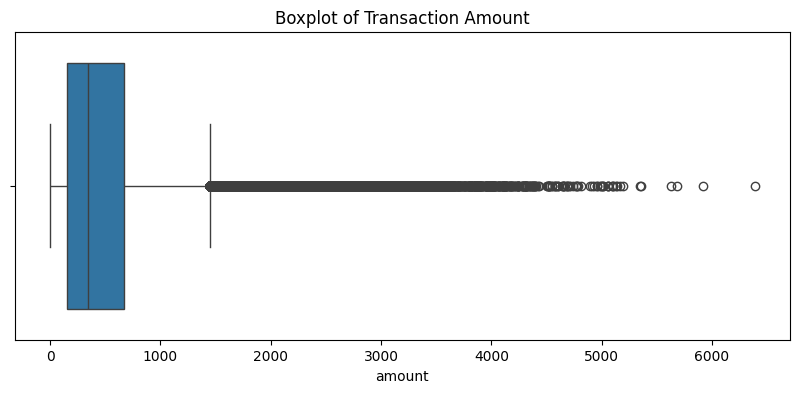

In [41]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['amount'])
plt.title("Boxplot of Transaction Amount")
plt.show()

### Create a new binary column to label outliers

In [44]:
# Using IQR method
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check number of outliers
df['amount_outlier'] = ((df['amount'] < lower_bound) | (df['amount'] > upper_bound)).astype(int)
df.head()

,amount,category,payment_method,account_type,device_info,is_fraud,year,month,amount_outlier
0,1097.00,Bills,UPI,Business,Tablet,0,2023,5,0
1,736.67,Travel,UPI,Credit,Android,0,2025,3,0
2,503.83,Bills,Credit Card,Business,iPhone,0,2024,3,0
3,776.28,Travel,Debit Card,Business,Tablet,0,2025,1,0
4,305.88,Bills,UPI,Credit,iPhone,0,2023,10,0


## Correlation Matrix

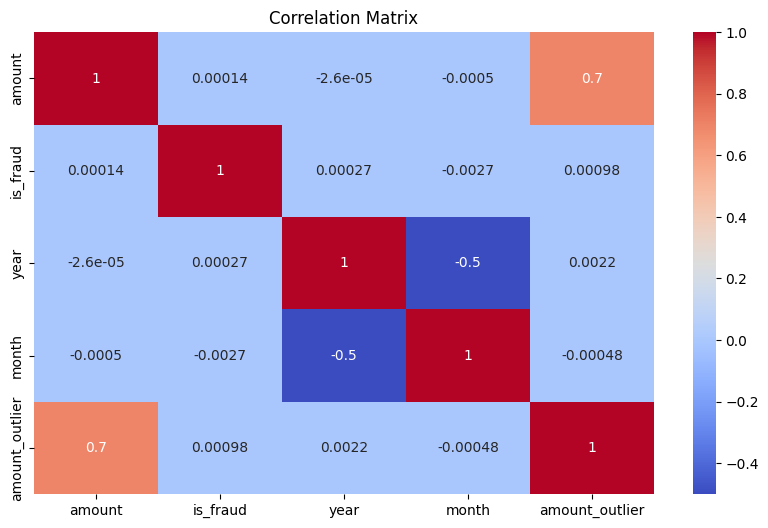

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Trends Over Time

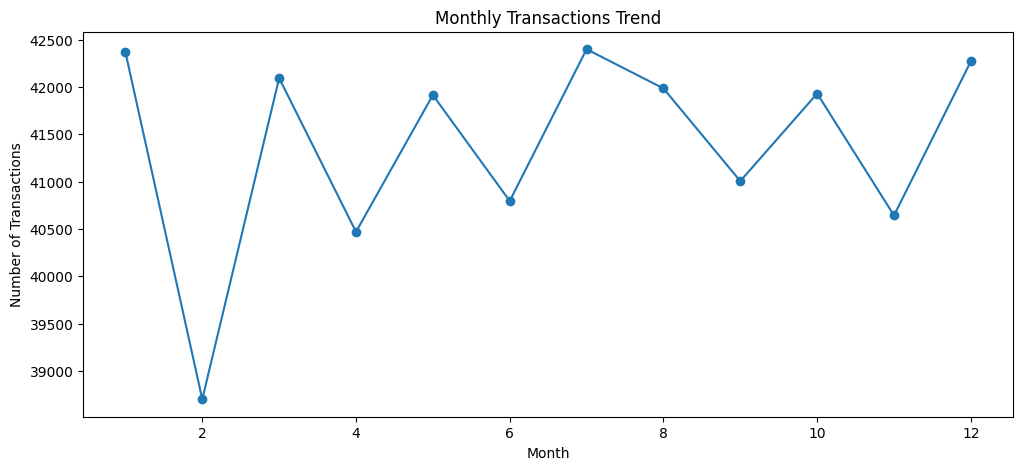

In [46]:
monthly_trend = df.groupby(df['month']).size()

monthly_trend.plot(kind='line', marker='o', figsize=(12, 5), title="Monthly Transactions Trend")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.show()

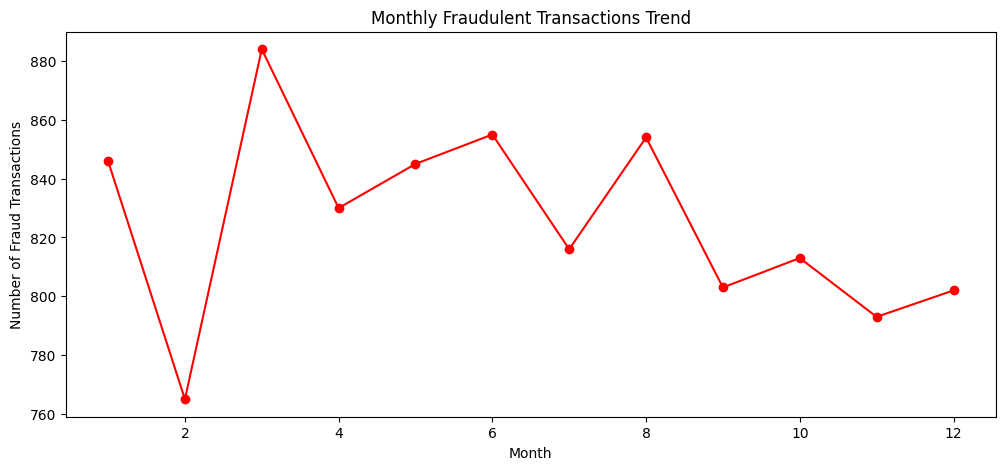

In [47]:
monthly_fraud = df[df['is_fraud'] == 1].groupby(df['month']).size()

monthly_fraud.plot(kind='line', marker='o', figsize=(12, 5), color='red', title="Monthly Fraudulent Transactions Trend")
plt.ylabel("Number of Fraud Transactions")
plt.xlabel("Month")
plt.show()

### Inspecting frauds grouped by Merchants

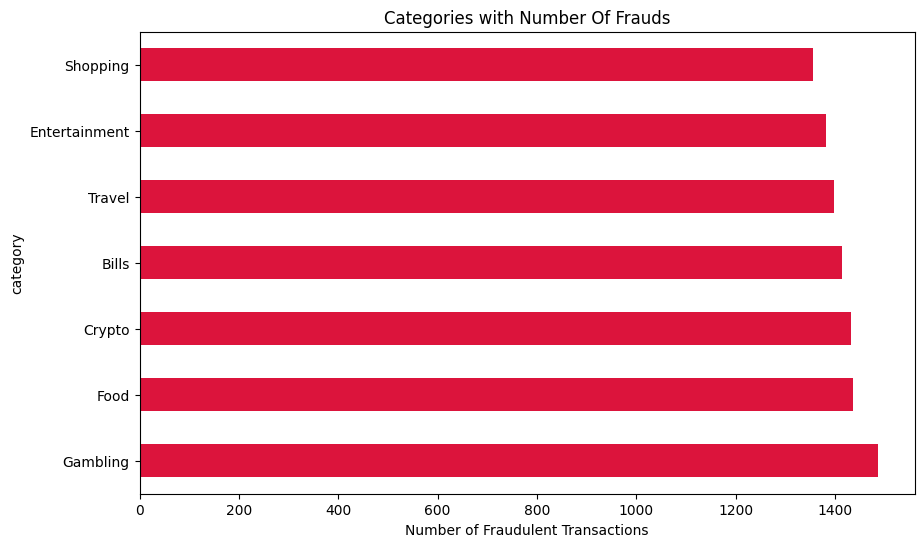

In [56]:
fraud_by_merchant = df[df['is_fraud'] == 1]['category'].value_counts()

fraud_by_merchant.plot(kind='barh', color='crimson', title="Categories with Number Of Frauds", figsize=(10, 6))
plt.xlabel("Number of Fraudulent Transactions")
plt.show()

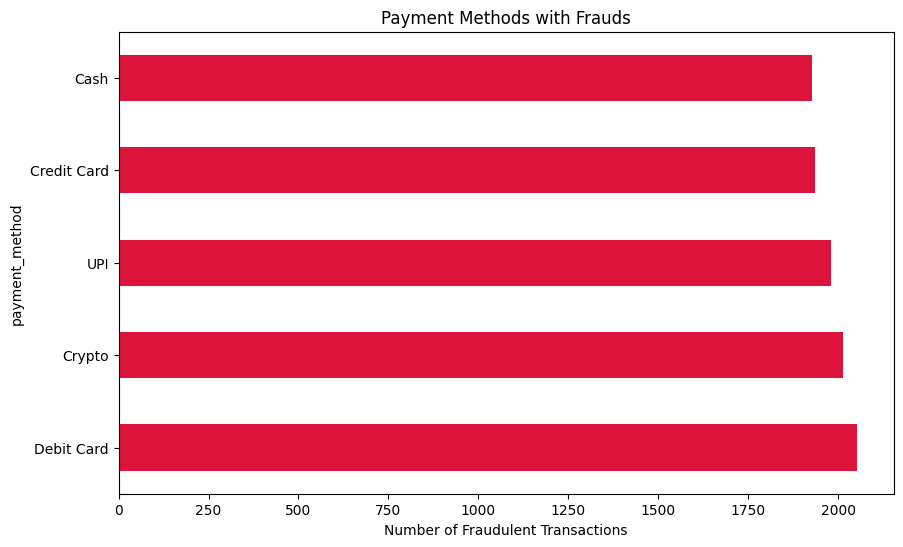

In [58]:
fraud_by_merchant = df[df['is_fraud'] == 1]['payment_method'].value_counts()

fraud_by_merchant.plot(kind='barh', color='crimson', title="Payment Methods with Frauds", figsize=(10, 6))
plt.xlabel("Number of Fraudulent Transactions")
plt.show()

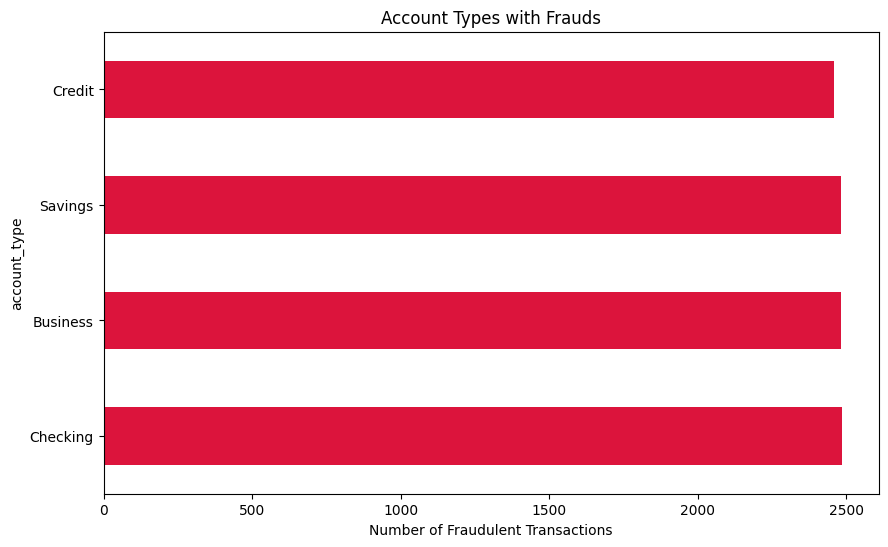

In [59]:
fraud_by_merchant = df[df['is_fraud'] == 1]['account_type'].value_counts()

fraud_by_merchant.plot(kind='barh', color='crimson', title="Account Types with Frauds", figsize=(10, 6))
plt.xlabel("Number of Fraudulent Transactions")
plt.show()

In [60]:
df.columns

Index(['amount', 'category', 'payment_method', 'account_type', 'device_info',
       'is_fraud', 'year', 'month', 'amount_outlier'],
      dtype='object')

## Handling categeorical Columns

In [63]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')

cat_cols = ['category', 'payment_method', 'account_type', 'device_info']
encoded = encoder.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))

df = df.drop(cat_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.head()

,amount,is_fraud,year,month,amount_outlier,category_Crypto,category_Entertainment,category_Food,category_Gambling,category_Shopping,...,payment_method_Crypto,payment_method_Debit Card,payment_method_UPI,account_type_Checking,account_type_Credit,account_type_Savings,device_info_Smartwatch,device_info_Tablet,device_info_Web,device_info_iPhone
0,1097.00,0,2023,5,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,736.67,0,2025,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,503.83,0,2024,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,776.28,0,2025,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,305.88,0,2023,10,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [64]:
df.shape

(496581, 22)